# **Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "Superstore.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Display first few rows and dataset info
print(df.head())
print(df.info())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  US-2021-103800  03-01-2021  07-01-2021  Standard Class    DP-13000   
1       2  US-2021-112326  04-01-2021  08-01-2021  Standard Class    PO-19195   
2       3  US-2021-112326  04-01-2021  08-01-2021  Standard Class    PO-19195   
3       4  US-2021-112326  04-01-2021  08-01-2021  Standard Class    PO-19195   
4       5  US-2021-141817  05-01-2021  12-01-2021  Standard Class    MB-18085   

   Customer Name      Segment Country/Region          City  ... Postal Code  \
0  Darren Powers     Consumer  United States       Houston  ...       77095   
1  Phillina Ober  Home Office  United States    Naperville  ...       60540   
2  Phillina Ober  Home Office  United States    Naperville  ...       60540   
3  Phillina Ober  Home Office  United States    Naperville  ...       60540   
4     Mick Brown     Consumer  United States  Philadelphia  ...       19143   

    Region       Product ID         Ca

In [5]:
# Handle missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Drop or fill missing values (example: dropping rows with NaN)
df = df.dropna()

# Convert columns to appropriate data types
# Convert columns to appropriate data types
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce') # Specify format and handle errors
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce') # Specify format and handle errors

# Check for duplicates and remove them
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df = df.drop_duplicates()

# Summary statistics
print(df.describe())


Missing values:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64
Number of duplicate rows: 0
             Row ID                     Order Date  \
count  10194.000000                          10194   
mean    5097.500000  2023-04-30 00:15:40.788699136   
min        1.000000            2021-01-03 00:00:00   
25%     2549.250000            2022-05-14 00:00:00   
50%     5097.500000            2023-06-25 00:00:00   
75%     7645.750000            2024-05-14 00:00:00   
max    10194.000000            2024-12-30 00:00:00   
std     2942.898656                            NaN   

                           Ship Dat

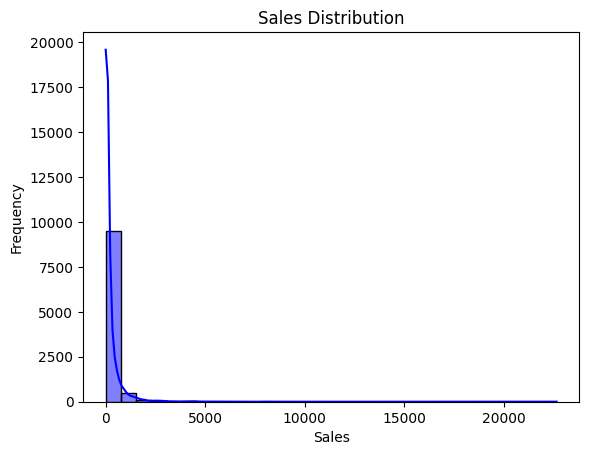

<ipython-input-4-1371b904b46d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')


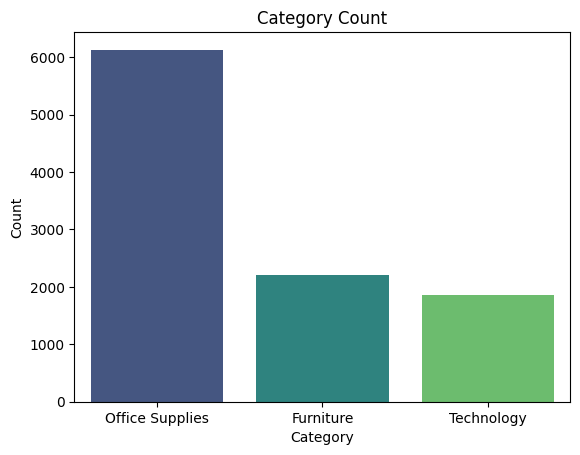

In [4]:
# Distribution of Sales
sns.histplot(df['Sales'], kde=True, bins=30, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Bar plot for Category
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Category Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


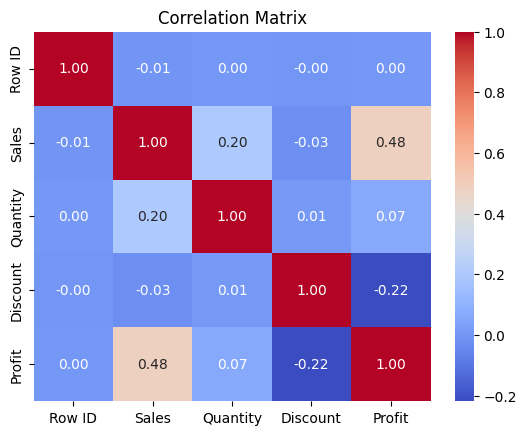

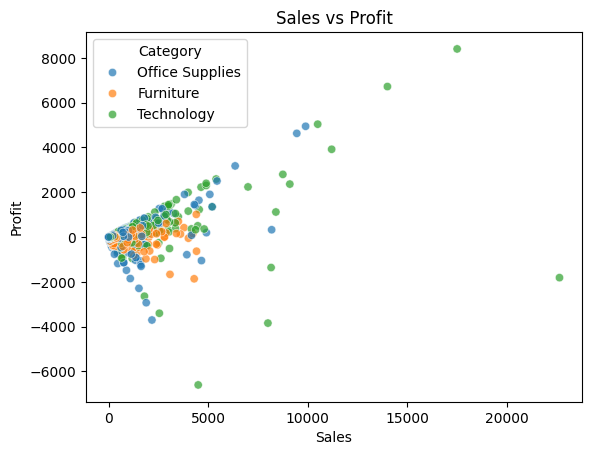

In [8]:
# Correlation Matrix

numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatterplot: Sales vs Profit
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.7)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

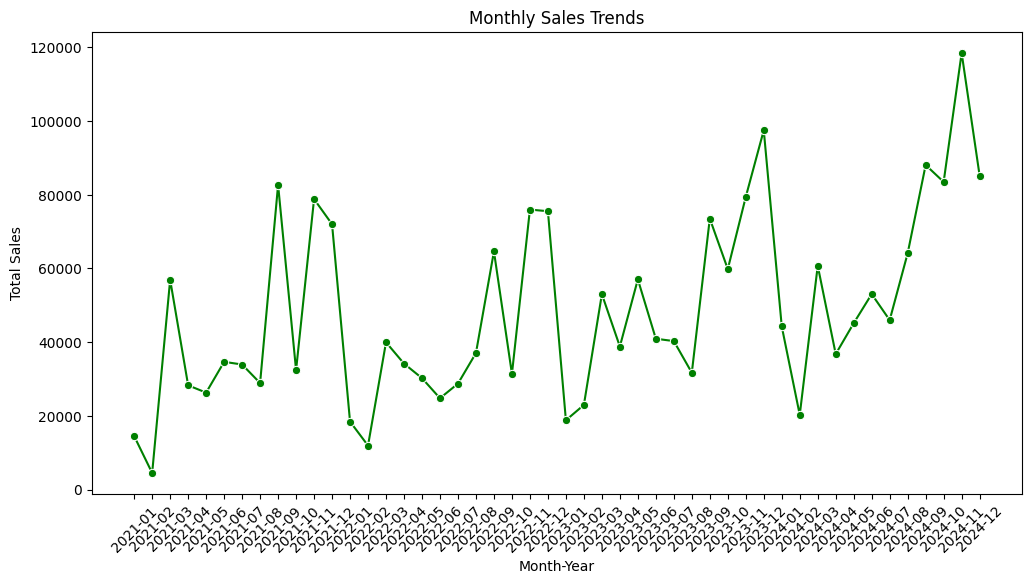

In [14]:
# Aggregate Sales over time
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()

# Convert 'Month-Year' to string before plotting
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)

# Line chart for Sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

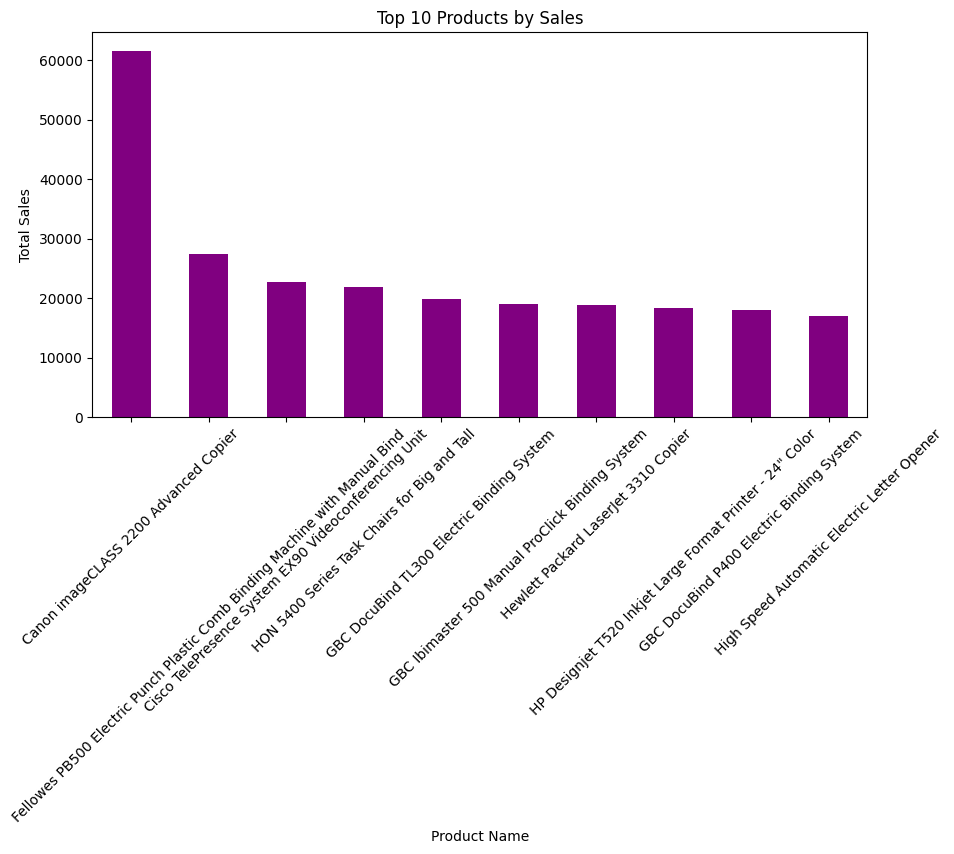

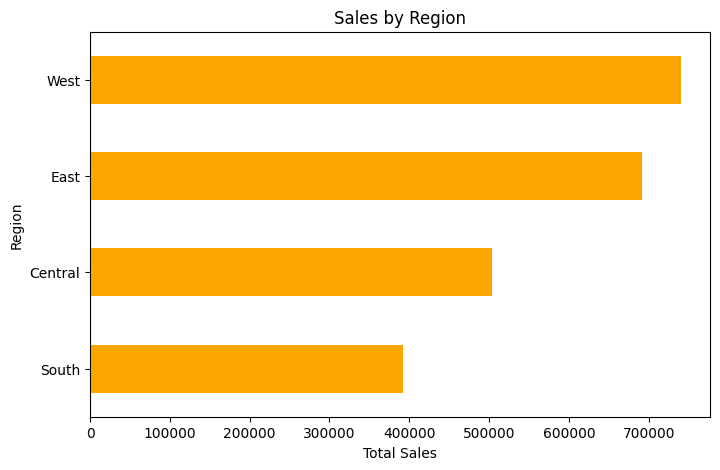

In [11]:
# Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='purple', figsize=(10, 5))
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
region_sales.plot(kind='barh', color='orange', figsize=(8, 5))
plt.title('Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')
plt.show()


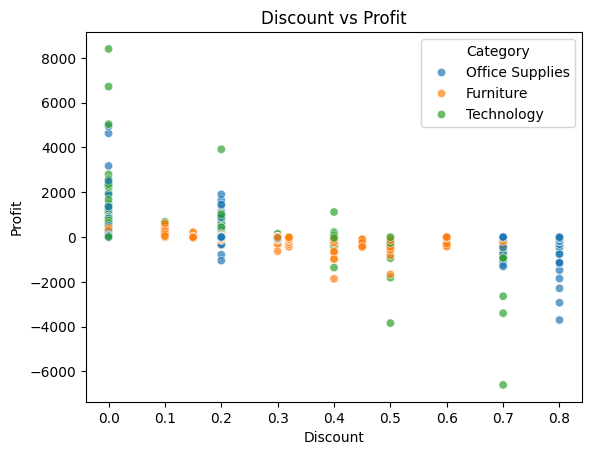

In [15]:
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


In [13]:
# Save cleaned data for future use
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'
